# The Nagel-Schreckenberg Model Code

This notebook includes the implementation of the traffic model as well as an animated presentation of the result. 
We first start with importing the necessary library. We only need the "random" library for this simulation.

In [1]:
import random

Next, we implement the class "Vroom" representing individual cars. 

In [2]:
class Vroom:
    """
    Car Settings

    Parameters:
        x (int): position on the road
        v (int): velocity
        v_max (int): max velocity
    """
    def __init__(self, x, v, v_max):
        self.x = x
        self.v = v
        self.v_max = v_max

The class "Vroom" will be used in the "spawn_cars" method of the class "Nagschreck", which implements the Nagel-Schreckenberg Model.

In [43]:
class Nagschreck:
    """
    An implementation of the Nagel-Schreckenberg Model
    """

    def __init__(self, num_car, road_len, v_max, p_slow=0.3, seed=None):
        """
        Initialize Parameters
        """
        self.num_car = num_car
        self.road_len = road_len
        self.v_max = v_max
        self.p_slow = p_slow  # random slowdown probability
        if seed is not None:
            random.seed(seed)
            np.random.seed(seed)        
        # list of Vroom objects
        self.cars = []
        self.spawn_cars()

    def spawn_cars(self):
        """
        Randomly place cars on the road with random initial velocities.
        No two cars start in the same cell.
        """
        positions = random.sample(range(self.road_len), self.num_car)
        self.cars = [
            Vroom(
                x=pos,
                v=random.randint(0, self.v_max),
                v_max=self.v_max
            )
            for pos in positions
        ]

    def _build_road(self):
        """
        Create a list 'road' where road[i] = index of car at cell i,
        or None if the cell is empty.
        """
        road = [None] * self.road_len
        for idx, car in enumerate(self.cars):
            road[car.x] = idx
        return road

    def distance_btw_car(self, car_idx, road):
        """
        Distance (number of empty cells) from this car to the next car ahead
        on a circular road.
        """
        car = self.cars[car_idx]
        gap = 0
        i = 1
        while i < self.road_len:
            j = (car.x + i) % self.road_len
            if road[j] is not None:
                break
            gap += 1
            i += 1
        return gap

    def update(self):
        """
        Apply one Nagel–Schreckenberg update step to all cars.
        """
        road = self._build_road()

        new_positions = [0] * self.num_car
        new_velocities = [0] * self.num_car

        # iterate over cars in any order (ID order is fine)
        for idx, car in enumerate(self.cars):
            v = car.v

            # 1. Acceleration (THIS caps at v_max)
            v = min(v + 1, self.v_max)

            # 2. Slowing down: avoid collision
            gap = self.distance_btw_car(idx, road)
            v = min(v, gap)

            # 3. Randomization
            if v > 0 and random.random() < self.p_slow:
                v -= 1

            # 4. Move car
            new_x = (car.x + v) % self.road_len

            new_positions[idx] = new_x
            new_velocities[idx] = v

        # Write back
        for i, car in enumerate(self.cars):
            car.x = new_positions[i]
            car.v = new_velocities[i]

    def road_string(self):
        """
        Return a string representation of the road:
        '.' for empty, number for velocity of car.
        """
        road = ['.'] * self.road_len
        for car in self.cars:
            road[car.x] = str(car.v)
        return ''.join(road)

    def run(self, steps=20):
        """
        Run the model for a given number of time steps and print the road.
        """
        for t in range(steps):
            print(self.road_string())
            self.update()


The output below comes from the "road_string" method of the "Nagschreck" class. Feel free to adjust the variables num_car, road_len, v_max, and p_slow. 

In [39]:
model = Nagschreck(num_car=25, road_len=50, v_max=5, p_slow=0.8)
model.run(steps=30)


.3302.0..52242....5..5........1...3112.430522...01
.0000.0..0000..2...1......5....1..0000.00000..2.00
1000.10..0000....2...2.......3..1.0000.00000..0.0.
0000.00..0000.......3..2......1.0.0000.0000.1.0..1
0000.00..0000.........2..2....0.0.0000.0000.0.0..0
0000.00..0000...........2..2..0.0.0000.0000..1.1.0
0000.00..0000............1..1.0.0.0000.000.1..10.0
0000.00..0000..............20.0.0.0000.00.1.1.00.0
0000.00..000.1.............00.0.0.0000.00.0.0.0.10
0000.00..000..1............00.0.0.0000.0.10..10.00
000.100..000...1...........00..10.0000.0.00..00.00
00.1000..000....1..........00..0.1000.10.00..00.00
00.0000..000.....1.........00..0.0000.00.00..00.00
0.10000..000......1........00..0.0000.00.00..00.00
0.00000..000........2......00..0.0000.00.00..0.100
.100000..00.1..........3...0.1..10000.0.10.1.0.000
.000000..00..1...........2..1..20000.10.00.0.0.000
.000000..00...1...........1..1.00000.00.00.0..1000
.000000..00.....2...........20.00000.00.00.0..0000
.000000..0.1.......3........00.

Here, we animate the Nagshcreck simulation. The libraries necessaries are shown below.

In [22]:
"""ANIMATION"""
import matplotlib.pyplot as plt
import numpy as np
import warnings

from matplotlib.animation import FuncAnimation

Below is the code to animate the output from the model. We output a GIF file because of its easier implementation to the README file.

MovieWriter ffmpeg unavailable; using Pillow instead.


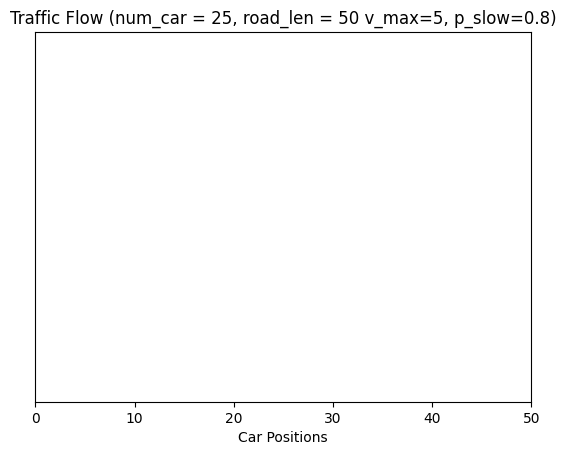

In [40]:
fig, ax = plt.subplots()
ax.set_xlim(0, model.road_len)
ax.set_ylim(-1, 1)
#ax.set_title(f'Traffic Flow (p_slow={model.p_slow}, v_max={model.v_max})')
ax.set_title(f'Traffic Flow (num_car = {model.num_car}, road_len = {model.road_len} v_max={model.v_max}, p_slow={model.p_slow})')
#ax.set_title(f'Traffic Flow Model')
ax.set_xlabel("Car Positions")
ax.set_yticks([])

dots, = ax.plot([], [], 'o')

def init():
    dots.set_data([], [])
    return dots,

def update(frame):
    model.update()
    xs = np.array([car.x for car in model.cars])
    ys = np.zeros_like(xs)
    dots.set_data(xs, ys)
    return dots,

anim = FuncAnimation(fig, update, frames=200, init_func=init, interval=100)
output_path = "C:/M358K/nasch_animation_p08.gif"
anim.save(output_path, fps=10)


Now, let's create the animation but in a circular shape. We first need to import more libaries. We need the math library to perform calculations relating to the circular shape of the road.

In [45]:
import math

Next, we introduce the option to spawn the cars evenly rather than randomly so we can see the ghost traffic effect. Starting from an evenly-spaced road makes it easier to see the effect.

In [46]:
def spawn_evenly(self):
    """Place cars evenly around the circular road, all with v = v_max initially."""
    step = self.road_len / self.num_car
    # round positions to nearest integer cell
    positions = [int(round(i * step)) % self.road_len for i in range(self.num_car)]
    # ensure unique positions (in rare rounding cases) by shifting duplicates
    seen = set()
    for i, pos in enumerate(positions):
       while pos in seen:
            pos = (pos + 1) % self.road_len
       positions[i] = pos
       seen.add(pos)
    self.cars = [Vroom(x=pos, v=self.v_max, v_max=self.v_max) for pos in positions]

Now we prepare the plots that will be used for the animation. 

In [ ]:
# ---- Simulation parameters tuned to show ghost traffic ----
L = 200            
N = 50
v_max = 5
p_slow = 0.2
seed = 2025         # reproducible
steps = 300
model = Nagschreck(num_car=N, road_len=L, v_max=v_max, p_slow=p_slow, seed=seed)


'C:/M358K/nasch_animation_circ.gif'

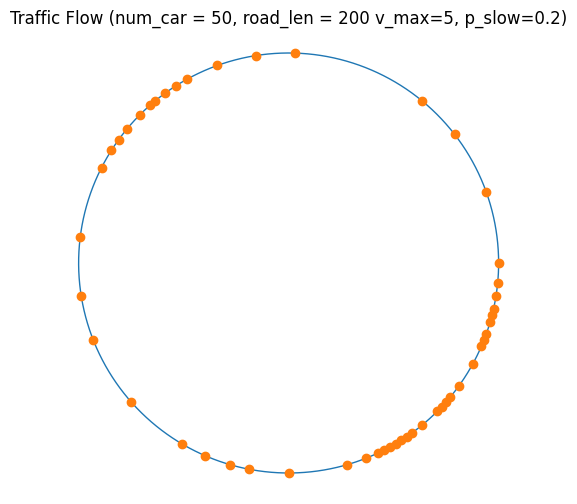

In [50]:

# Introduce a tiny perturbation to trigger "ghost" jams:
# make one car slow down at t=0 (or set slightly lower speed)
model.cars[0].v = max(0, model.cars[0].v - 2)

# ---- Prepare circular coordinates for plotting ----
def coords_from_cell(x, L, radius=1.0):
    theta = 2 * math.pi * (x / L)
    return radius * math.cos(theta), radius * math.sin(theta)

# initial coords
xs = np.array([coords_from_cell(car.x, L)[0] for car in model.cars])
ys = np.array([coords_from_cell(car.x, L)[1] for car in model.cars])

# ---- Build animation ----
fig, ax = plt.subplots(figsize=(6,6))
ax.set_aspect('equal')
ax.axis('off')  # hide axes for a clean circular road
ax.set_title(f'Traffic Flow (num_car = {model.num_car}, road_len = {model.road_len} v_max={model.v_max}, p_slow={model.p_slow})')


# draw the circular road
theta = np.linspace(0, 2*np.pi, 400)
road_x = np.cos(theta)
road_y = np.sin(theta)
ax.plot(road_x, road_y, linewidth=1)

# scatter for cars (we'll update positions)
points, = ax.plot(xs, ys, 'o', markersize=6)

# optional: show arrows indicating velocity by radial offset (small)
def get_marker_positions_and_sizes():
    xs = []
    ys = []
    sizes = []
    for car in model.cars:
        xcoord, ycoord = coords_from_cell(car.x, L)
        xs.append(xcoord)
        ys.append(ycoord)
        # use velocity to scale marker size slightly (so faster cars appear a bit larger)
        sizes.append(40 + 10 * car.v)
    return np.array(xs), np.array(ys), np.array(sizes)

# initialize scatter
init_xs, init_ys, init_sizes = get_marker_positions_and_sizes()
points.set_data(init_xs, init_ys)
points.set_markersize(6)

def init():
    xs, ys, sizes = get_marker_positions_and_sizes()
    points.set_data(xs, ys)
    return points,

def update(frame):
    # update model several times per frame to make waves visible faster
    model.update()
    xs, ys, sizes = get_marker_positions_and_sizes()
    points.set_data(xs, ys)
    # matplotlib's Line2D markersize controls size; can't set per-point sizes easily with set_data
    # so we keep a uniform marker size but visually rely on clustering to show jams.
    return points,

# create animation
anim = FuncAnimation(fig, update, frames=steps, init_func=init, interval=80)

# save as GIF using pillow
output_path = "C:/M358K/nasch_animation_circ.gif"
anim.save(output_path, writer="pillow", fps=12)

output_path